In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_22.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_53.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_69.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_68.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_51.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_88.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_4.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_75.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_16.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_72.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_58.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_

In [58]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import keras
from keras import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D, Reshape, LSTM
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.applications import MobileNetV2

In [72]:
dir = '/kaggle/input/microorganism-image-classification/Micro_Organism'
labels = os.listdir(dir)
labels

['Amoeba',
 'Euglena',
 'Spherical_bacteria',
 'Hydra',
 'Rod_bacteria',
 'Spiral_bacteria',
 'Paramecium',
 'Yeast']

In [73]:
for label in labels:
    print(label, len(os.listdir(dir+'/'+label)))

Amoeba 72
Euglena 168
Spherical_bacteria 86
Hydra 76
Rod_bacteria 85
Spiral_bacteria 75
Paramecium 152
Yeast 75


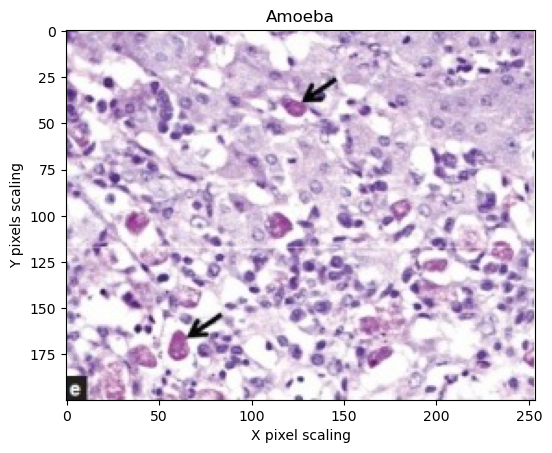

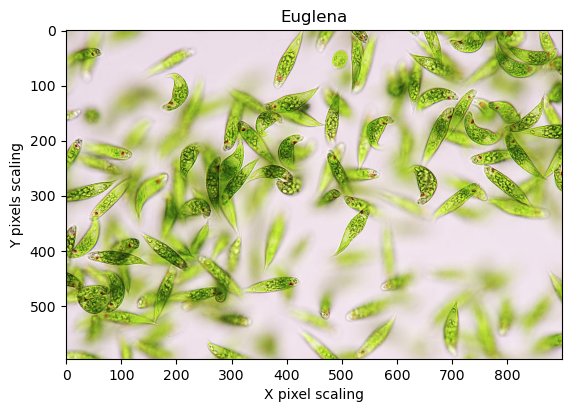

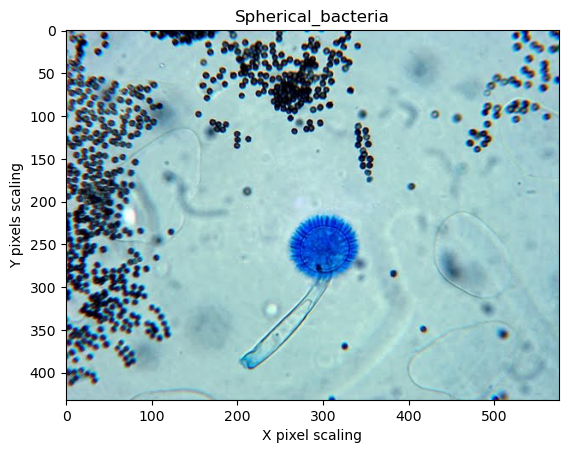

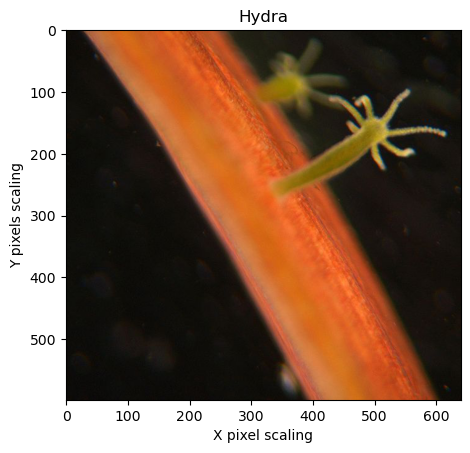

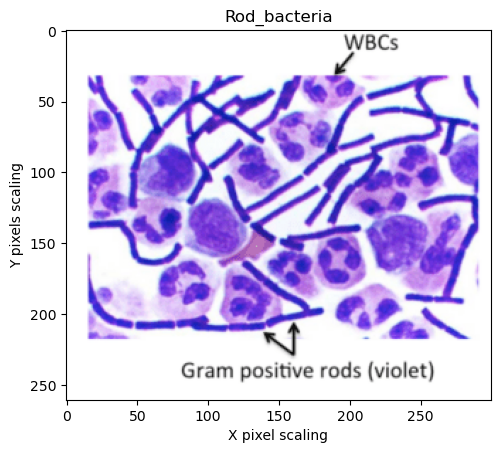

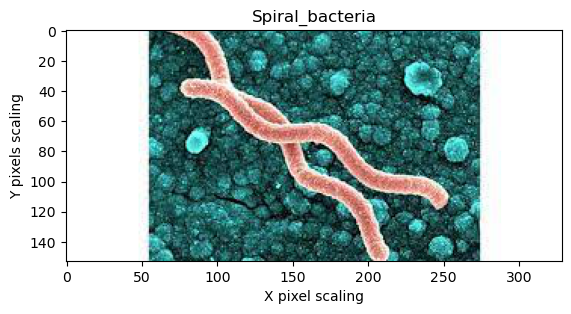

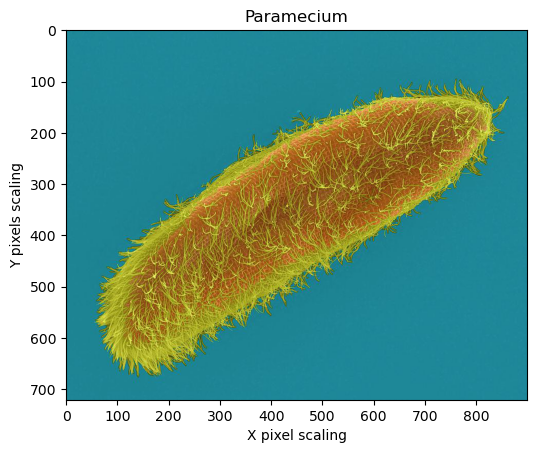

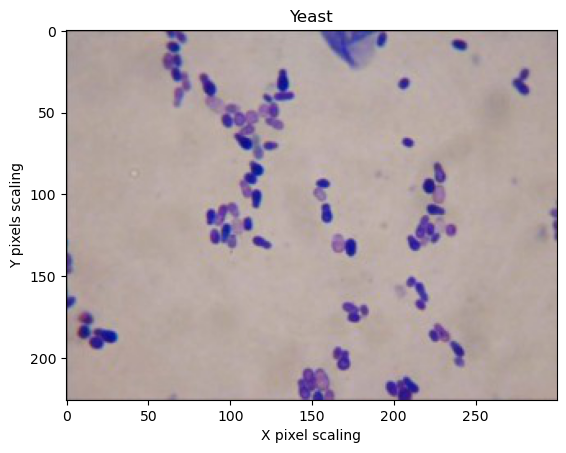

In [74]:
for label in labels:
    path = os.listdir(dir + '/' + label)
    img = dir + '/' + label + '/' + path[1]
    plt.title(label)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.show()

In [76]:
datagen = ImageDataGenerator(
        samplewise_center=True, 
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True, 
        vertical_flip=False,
        rescale=1./255,
        validation_split=0.2)


train_data=datagen.flow_from_directory(dir,
                                       target_size=(64,64),
                                       batch_size=32,
                                       class_mode='categorical',
                                       shuffle=True,subset='training')


test_data=datagen.flow_from_directory(dir,
                                       target_size=(64,64),
                                       batch_size=1,
                                       shuffle=False,subset='validation')

Found 633 images belonging to 8 classes.
Found 156 images belonging to 8 classes.


In [80]:
datagen = ImageDataGenerator(
    samplewise_center=True, 
    rotation_range=10, 
    zoom_range = 0.1, 
    width_shift_range=0.1,
    height_shift_range=0.1,  
    horizontal_flip=True, 
    vertical_flip=False,
    rescale=1./255,
    validation_split=0.10
)

train_data = datagen.flow_from_directory(
    dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_data = datagen.flow_from_directory(
    dir,
    target_size=(256,256),
    batch_size=32,
    shuffle=False,
    subset='validation'
)

test_data = datagen.flow_from_directory(
    dir,
    target_size=(256,256),
    batch_size=32,
    shuffle=False,
    subset='validation'
)


Found 714 images belonging to 8 classes.
Found 75 images belonging to 8 classes.
Found 75 images belonging to 8 classes.


In [83]:
model=Sequential()
size=(256,256,3)
model.add(Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=size))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(8, activation='softmax'))

#Compiling the model
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

#Training the model
base_model=model.fit(train_data, epochs=40, steps_per_epoch=len(train_data), validation_data=validation_data, validation_steps=len(validation_data))

Epoch 1/40
23/23 [==============================] - 35s 1s/step - loss: 1.9848 - accuracy: 0.2185 - val_loss: 2.0743 - val_accuracy: 0.2267
Epoch 2/40
23/23 [==============================] - 33s 1s/step - loss: 1.8627 - accuracy: 0.2801 - val_loss: 1.9496 - val_accuracy: 0.2800
Epoch 3/40
23/23 [==============================] - 35s 1s/step - loss: 1.7627 - accuracy: 0.3193 - val_loss: 1.9794 - val_accuracy: 0.3467
Epoch 4/40
23/23 [==============================] - 33s 1s/step - loss: 1.7108 - accuracy: 0.3389 - val_loss: 2.0109 - val_accuracy: 0.3467
Epoch 5/40
23/23 [==============================] - 33s 1s/step - loss: 1.6487 - accuracy: 0.3810 - val_loss: 1.9171 - val_accuracy: 0.3467
Epoch 6/40
23/23 [==============================] - 33s 1s/step - loss: 1.6504 - accuracy: 0.3768 - val_loss: 2.0411 - val_accuracy: 0.3867
Epoch 7/40
23/23 [==============================] - 34s 1s/step - loss: 1.6247 - accuracy: 0.4160 - val_loss: 1.9675 - val_accuracy: 0.3600
Epoch 8/40
23/23 [==